C:\Users\Dell\AppData\Local\Temp\ipykernel_10444\2070608535.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y='stroke', palette='magma')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10444\2070608535.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y='stroke', palette='magma')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10444\2070608535.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y='stroke', palette='magma')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10444\2070608535.py:13: Future

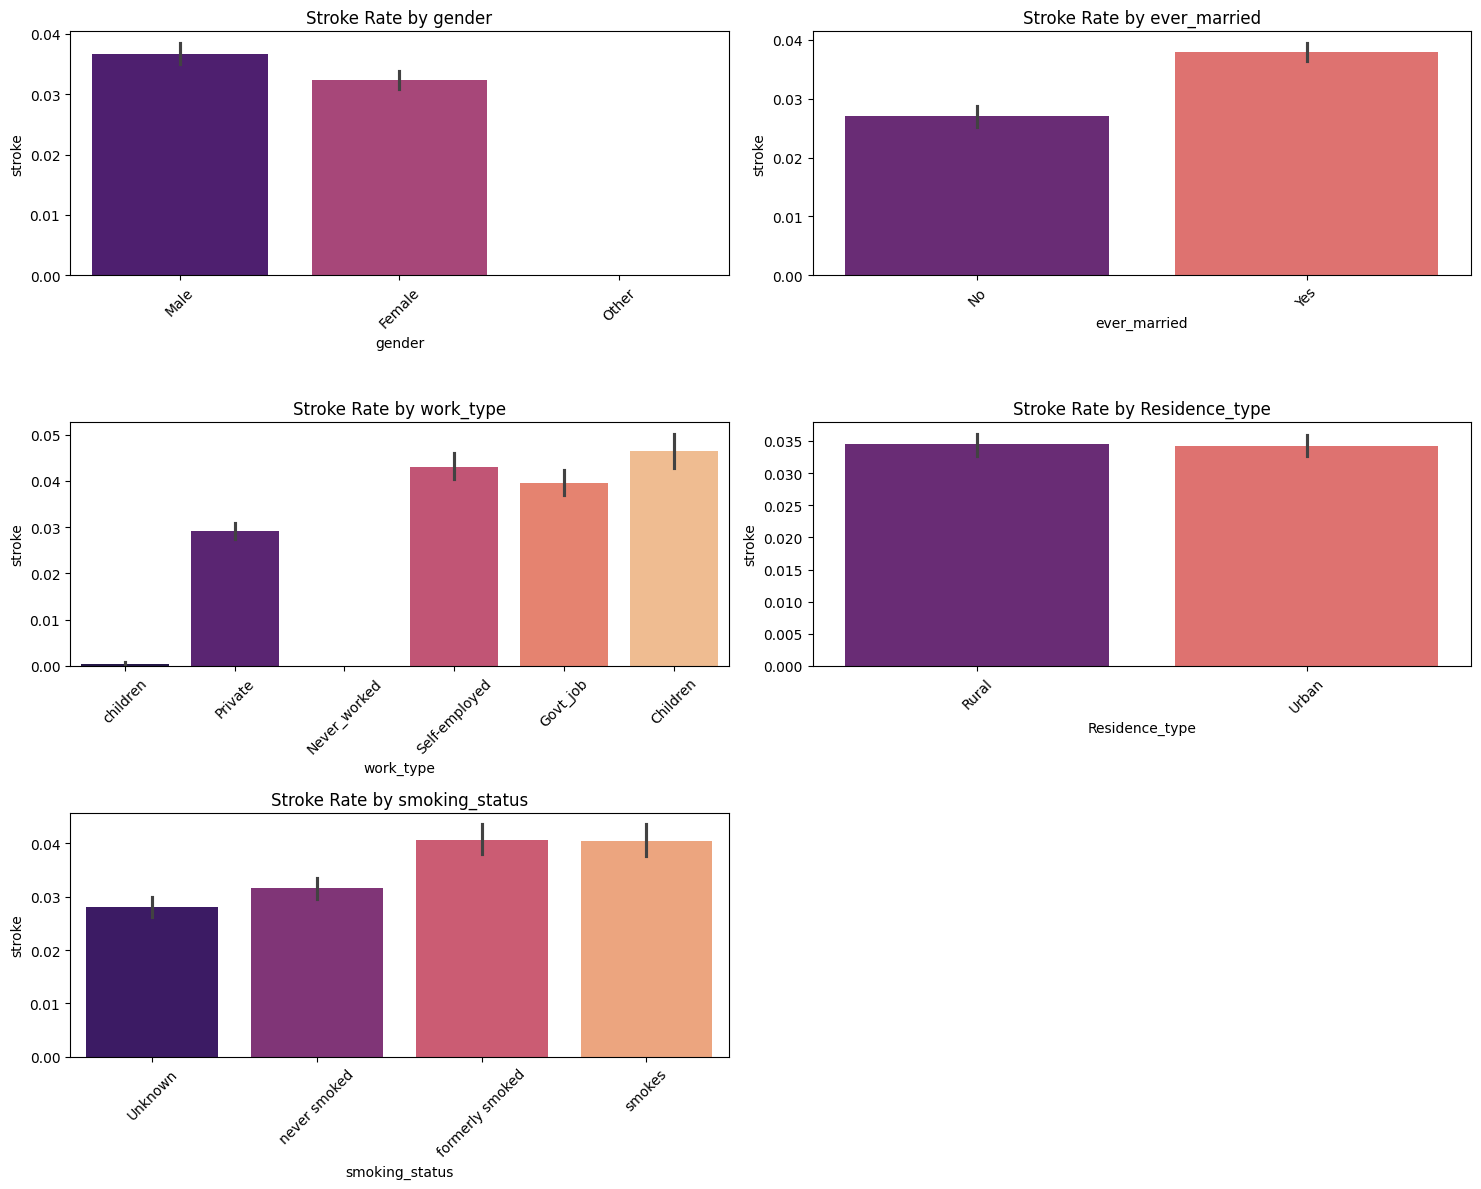

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv("final_stroke_data_cleaned.csv")
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=df, x=col, y='stroke', palette='magma')
    plt.title(f'Stroke Rate by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

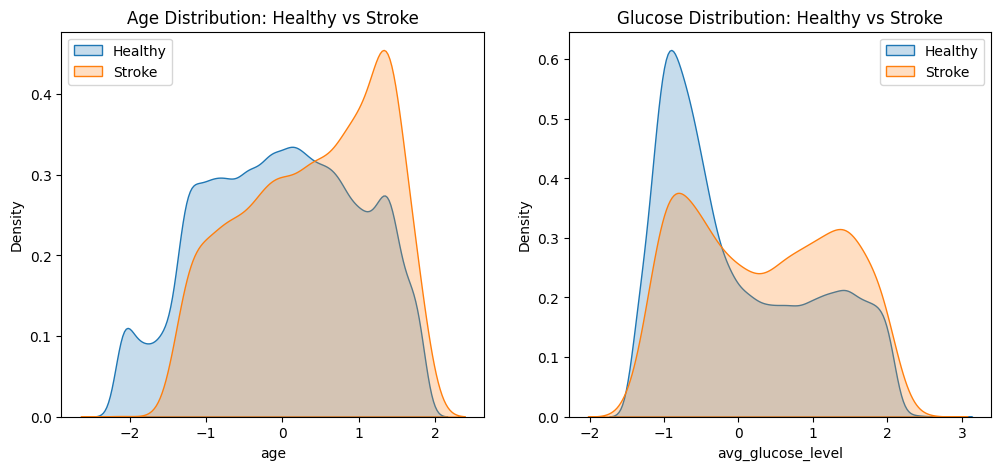

In [4]:
# Numerical cols
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df['stroke'] == 0], x='age', label='Healthy', fill=True)
sns.kdeplot(data=df[df['stroke'] == 1], x='age', label='Stroke', fill=True)
plt.title('Age Distribution: Healthy vs Stroke')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', label='Healthy', fill=True)
sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', label='Stroke', fill=True)
plt.title('Glucose Distribution: Healthy vs Stroke')
plt.legend()

plt.show()

### **EDA Summary Report**

* **Gender:** Males have a slightly higher stroke prevalence than females.
* **Marriage:** "Ever Married" individuals show a significantly higher stroke rate, acting as a strong proxy for age.
* **Smoking:** Former smokers and current smokers share almost the same high-risk level.
* **Age Factor:** Stroke cases are heavily concentrated in the older age group (Clear shift to the right in KDE plot).
* **Glucose Factor:** Stroke patients show a significant second peak at high glucose levels, confirming the diabetes-stroke link.

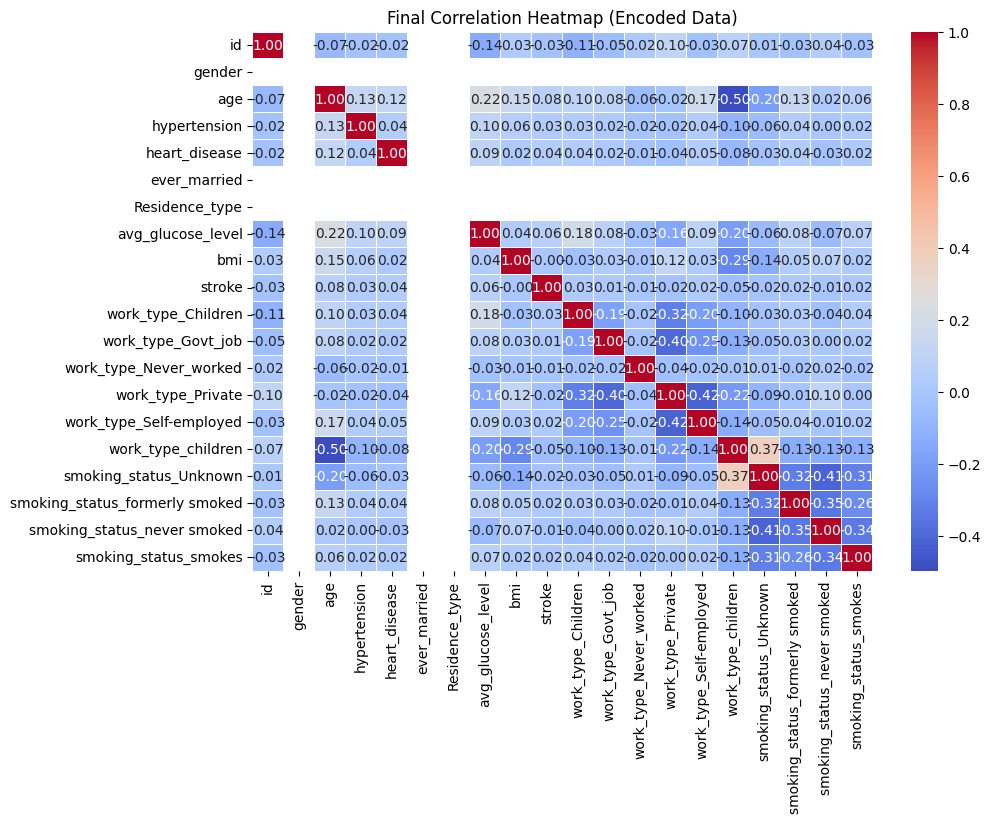

In [7]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})


df_encoded = pd.get_dummies(df, columns=['work_type', 'smoking_status'])

plt.figure(figsize=(10, 7))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Final Correlation Heatmap (Encoded Data)')
plt.show()

### **Final EDA Insights (Statistical Proof)**
1. **Age Factor:** Age is the strongest predictor (Correlation: 0.08). The KDE plot confirms that stroke density peaks at the high end of the age scale.
2. **Glucose Link:** There is a clear "High-Glucose" subgroup among stroke patients, as shown in the bimodal distribution (Correlation: 0.06).
3. **Work Type Anomaly:** The "Children" category showed high rates in bar plots due to its strong negative correlation with age (-0.50), making any single case in that small group look like a huge spike.
4. **Smoking Impact:** Current and former smokers show nearly identical risk levels, suggesting long-term damage that doesn't disappear immediately after quitting.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


cols_to_scale = ['age', 'avg_glucose_level', 'bmi']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

import joblib


df_encoded.to_csv('stroke_data_for_ml.csv', index=False)

joblib.dump(scaler, 'feature_scaler.pkl')



✅ تمت العملية بنجاح! عندك دلوقتي ملف الداتا وملف الـ Scaler.
